# Final Project Submission

Please fill out:
* Student name: Acusio Bivona
* Student pace: self paced / part time / full time: Part Time
* Scheduled project review date/time: 
* Instructor name: James Irving, Jeff Herman
* Blog post URL:
* Video of 5-min Non-Technical Presentation:


# TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=4rem>
    
- [Introduction](#INTRODUCTION)<br>
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- [Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>
</font>
___



## RESOURCES FOR YOU 
**<font color='red'>(Delete from final notebook)</font>**

- [OVERVIEW OF OSEMiN](#OVERVIEW-OF-OSEMiN)
- [PROCESS-CHECKLIST](#PROCESS-CHECKLIST)
    - Can actually keep this part if you'd like.
- [LINKS FOR MOD 1 PROJECT](#LINKS-FOR-MOD-1-PROJECT)



# RESOURCES FOR YOU
<font color='red' weight='bold'>- NOTE: DELETE THIS SECTION & SUB SECTIONS FROM YOUR FINAL NOTEBOOK</font>

### LINKS FOR MOD 1 PROJECT
* [Blog Post: 5 steps of a data science project lifecycle](https://towardsdatascience.com/5-steps-of-a-data-science-project-lifecycle-26c50372b492)
* ML models google sheet https://docs.google.com/spreadsheets/d/1qe4nYjGKSxBNCkeV2gxxgObBpKKc0TKrbk0Y9LTrpV8
* How to detect and remove outliers:
    * https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
* How to handle categorical variables. 
    * https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63
* Sci-Kit Learn’s Scalers visually explained 
    * http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html


## OVERVIEW OF OSEMiN

<img src='https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/OSEMN.png' width=800>
<center><a href="https://www.kdnuggets.com/2018/02/data-science-command-line-book-exploring-data.html"> 
    </a></center>

> <font size=4em>The Data Science Process we'll be using during this section--OSEMiN (pronounced "OH-sum", rhymes with "possum").  This is the most straightforward of the Data Science Processes discussed so far.  **Note that during this process, just like the others, the stages often blur together.***  It is completely acceptable (and ***often a best practice!) to float back and forth** between stages as you learn new things about your problem, dataset, requirements, etc.  
It's quite common to get to the modeling step and realize that you need to scrub your data a bit more or engineer a different feature and jump back to the "Scrub" stage, or go all the way back to the "Obtain" stage when you realize your current data isn't sufficient to solve this problem. 
As with any of these frameworks, *OSEMiN is meant to be treated as guidelines, not law. 
</font>


### OSEMN DETAILS


**OBTAIN**

- This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem. 

**SCRUB**

- During this stage, we'll focus on preprocessing our data.  Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.  The line with this stage really blurs with the _Explore_ stage, as it is common to only realize that certain columns require cleaning or preprocessing as a result of the visualzations and explorations done during Step 3.  

- Note that although technically, categorical data should be one-hot encoded during this step, in practice, it's usually done after data exploration.  This is because it is much less time-consuming to visualize and explore a few columns containing categorical data than it is to explore many different dummy columns that have been one-hot encoded. 

**EXPLORE**

- This step focuses on getting to know the dataset you're working with. As mentioned above, this step tends to blend with the _Scrub_ step mentioned above.  During this step, you'll create visualizations to really get a feel for your dataset.  You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks liek that.  If your project is a classification task, you may check the balance of the different classes in your dataset.  If your problem is a regression task, you may check that the dataset meets the assumptions necessary for a regression task.  

- At the end of this step, you should have a dataset ready for modeling that you've thoroughly explored and are extremely familiar with.  

**MODEL**

- This step, as with the last two frameworks, is also pretty self-explanatory. It consists of building and tuning models using all the tools you have in your data science toolbox.  In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results.  As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like _Scrub_ or _Explore_, and make some changes to see how it affects the model.  

**iNTERPRET**

- During this step, you'll interpret the results of your model(s), and communicate results to stakeholders.  As with the other frameworks, communication is incredibily important! During this stage, you may come to realize that further investigation is needed, or more data.  That's totally fine--figure out what's needed, go get it, and start the process over! If your results are satisfactory to all stakeholders involved, you may also go from this stage right into productionizing your model and automating processes necessary to support it.  



<font color='red'>Note: Delete this markdown cell from your final project notebook</font>

## PROCESS CHECKLIST


> Keep in mind that it is normal to jump between the OSEMN phases and some of them will blend together, like SCRUB and EXPLORE.

1. **[OBTAIN](#OBTAIN)**
    - Import data, inspect, check for datatypes to convert and null values
    - Display header and info.
    - Drop any unneeded columns, if known (`df.drop(['col1','col2'],axis=1,inplace=True`)
    <br><br>

2. **[SCRUB](#SCRUB)**
    - Recast data types, identify outliers, check for multicollinearity, normalize data**
    - Check and cast data types
        - [ ] Check for #'s that are store as objects (`df.info()`,`df.describe()`)
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted.
            - Decide how to deal weird/null values (`df.unique()`, `df.isna().sum()`)
            - `df.fillna(subset=['col_with_nulls'],'fill_value')`, `df.replace()`
        - [ ] Check for categorical variables stored as integers.
            - May be easier to tell when you make a scatter plotm or `pd.plotting.scatter_matrix()`
            
    - [ ] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [ ] Check for multicollinearity
        - Use seaborn to make correlation matrix plot 
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
3. **[EXPLORE](#EXPLORE)**
    - [ ] Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
        - Can also do kernel density estimates
    - [ ] Use scatter plots to check for linearity and possible categorical variables (`df.plot("x","y")`)
        - categoricals will look like vertical lines
    - [ ] Use `pd.plotting.scatter_matrix(df)` to visualize possible relationships
    - [ ] Check for linearity.
   
4. **[MODEL](#MODEL)**

    - **Fit an initial model:** 
        - Run an initial model and get results

    - **Holdout validation / Train/test split**
        - use sklearn `train_test_split`
    
5. **[iNTERPRET](#iNTERPRET)**
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
    - **Revise the fitted model**
        - Multicollinearity is big issue for lin regression and cannot fully remove it
        - Use the predictive ability of model to test it (like R2 and RMSE)
        - Check for missed non-linearity
        
- **Interpret final model and draw >=3 conclusions and recommendations from dataset**

# <font color='red'> START YOUR CODE BELOW:</font>

# INTRODUCTION

> Explain the point of your project and what question you are trying to answer with your modeling.



# OBTAIN

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.4.35 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [2]:
pd.set_option('display.max_columns',0)

In [3]:
csv="https://raw.githubusercontent.com/learn-co-students/dsc-v2-mod1-final-project-online-ds-pt-100719/master/kc_house_data.csv"
df = pd.read_csv(csv)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# SCRUB

DataType:
	 float64
Null Values Present = 0


count      21597.000
mean      540296.574
std       367368.140
min        78000.000
25%       322000.000
50%       450000.000
75%       645000.000
max      7700000.000
Name: price, dtype: float64


Value Counts:


350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
              ...   
870515.0    0.000046
336950.0    0.000046
386100.0    0.000046
176250.0    0.000046
884744.0    0.000046
Name: price, Length: 3622, dtype: float64

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a20ac1b00>,
       dtype=object))

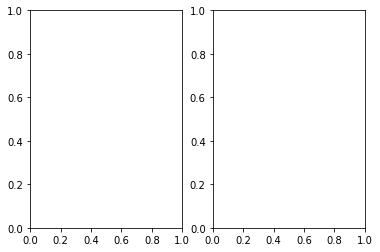

In [5]:
def check_column(df, col_name, n_unique=10):
    """Displays info on null values, datatype, unqiue values
    and displays .describe()
    
    Args:
        df (df): contains the columns
        col_name (str): name of the df column to show
        n_unique (int): Number of unique values top show.
    
    Return:
        fig, ax (Matplotlib Figure and Axes)
    """
    
    print('DataType:')
    print('\t',df[col_name].dtypes)
    
    num_nulls = df[col_name].isna().sum()
    print(f'Null Values Present = {num_nulls}')
    
    display(df[col_name].describe().round(3))
    
    print('\nValue Counts:')
    display(df[col_name].value_counts(n_unique))
    
    ## Add some EDA figures
    fig, ax = plt.subplots(ncols=2)
    
    return fig,ax
    
    
    
check_column(df,'price')

In [6]:
df.info()
#Waterfront, view(only a few), yr_renovated contain null values
df.describe().round(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.00,21597.000
mean,4.580474e+09,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.62,12758.284
std,2.876736e+09,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.23,27274.442
min,1.000102e+06,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.00,651.000
25%,2.123049e+09,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.00,5100.000
50%,3.904930e+09,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.00,7620.000
75%,7.308900e+09,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.00,10083.000
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.00,871200.000


In [7]:
df.drop(['id','date'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(1)
memory usage: 3.1+ MB


In [9]:
df['view'].value_counts()
df['view'].median()
df['view'].fillna(df['view'].median(), inplace=True)
df['view'].isna().sum()

0

In [10]:
df['yr_renovated'].describe()
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [11]:
df['waterfront'].mean()
df['waterfront'].head()
df['waterfront'].value_counts()
df['waterfront'].median()
df['waterfront'].fillna(df['waterfront'].median(), inplace=True)
df['waterfront'].isna().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(1)
memory usage: 3.1+ MB


In [13]:
df['is_renovated'] = np.where(df['yr_renovated'] == 0, 0, 1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
is_renovated     21597 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 3.3+ MB


In [15]:
df.drop(['yr_renovated'],axis=1,inplace=True)

In [16]:
df['sqft_basement'] = df['sqft_basement'].replace(to_replace='?', value=0.0)
df['sqft_basement'].value_counts()

0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
2130.0        1
2850.0        1
3260.0        1
3000.0        1
1135.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [17]:
df["sqft_basement"] = df["sqft_basement"].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
is_renovated     21597 non-null int64
dtypes: float64(8), int64(11)
memory usage: 3.1 MB


In [20]:
def find_outliers(col):
    """Use scipy to calcualte absoliute Z-scores 
    and return boolean series where True indicates it is an outlier
    Args:
        col (Series): a series/column from your DataFrame
    Returns:
        idx_outliers (Series): series of  True/False for each row in col
        
    Ex:
    >> idx_outs = find_outliers(df['bedrooms'])
    >> df_clean = df.loc[idx_outs==False]"""
    from scipy import stats
    z = np.abs(stats.zscore(col))
    idx_outliers = np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)

In [21]:
df_test = pd.DataFrame()
for col in df.drop('zipcode', axis=1).columns:
    idx = find_outliers(df[col])
    df_test[col] = idx

In [22]:
idx_all_outliers = df_test.any(axis=1)
df_clean = df[idx_all_outliers==False]
df_clean.head()
df_clean.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated
count,1.942500e+04,19425.000000,19425.000000,19425.000000,19425.000000,19425.000000,19425.0,19425.000000,19425.000000,19425.000000,19425.000000,19425.000000,19425.000000,19425.000000,19425.000000,19425.000000,19425.000000,19425.000000,19425.000000
mean,4.854289e+05,3.325097,2.042368,1953.524479,9835.552227,1.481236,0.0,0.094826,3.414826,7.534157,1694.627902,253.467799,1970.583218,98079.080051,47.561120,-122.222451,1905.973951,9072.826718,0.208597
std,2.353581e+05,0.851639,0.690797,739.456329,11485.821758,0.538466,0.0,0.407364,0.644459,1.023649,705.909533,386.870743,29.440798,53.420152,0.139747,0.128498,597.011404,8990.714999,0.406316
min,8.200000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.0,0.000000,2.000000,5.000000,370.000000,0.000000,1900.000000,98001.000000,47.176400,-122.502000,460.000000,651.000000,0.000000
25%,3.149500e+05,3.000000,1.500000,1400.000000,5000.000000,1.000000,0.0,0.000000,3.000000,7.000000,1170.000000,0.000000,1951.000000,98033.000000,47.470200,-122.331000,1460.000000,5000.000000,0.000000
50%,4.350000e+05,3.000000,2.000000,1840.000000,7350.000000,1.000000,0.0,0.000000,3.000000,7.000000,1510.000000,0.000000,1974.000000,98072.000000,47.573200,-122.241000,1790.000000,7421.000000,0.000000
75%,6.010000e+05,4.000000,2.500000,2410.000000,9897.000000,2.000000,0.0,0.000000,4.000000,8.000000,2100.000000,500.000000,1996.000000,98118.000000,47.680700,-122.136000,2260.000000,9600.000000,0.000000
max,1.640000e+06,6.000000,4.250000,4750.000000,137214.000000,3.000000,0.0,2.000000,5.000000,11.000000,4270.000000,1600.000000,2015.000000,98199.000000,47.777600,-121.797000,4040.000000,93825.000000,1.000000


In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19425 entries, 0 to 21596
Data columns (total 19 columns):
price            19425 non-null float64
bedrooms         19425 non-null int64
bathrooms        19425 non-null float64
sqft_living      19425 non-null int64
sqft_lot         19425 non-null int64
floors           19425 non-null float64
waterfront       19425 non-null float64
view             19425 non-null float64
condition        19425 non-null int64
grade            19425 non-null int64
sqft_above       19425 non-null int64
sqft_basement    19425 non-null float64
yr_built         19425 non-null int64
zipcode          19425 non-null int64
lat              19425 non-null float64
long             19425 non-null float64
sqft_living15    19425 non-null int64
sqft_lot15       19425 non-null int64
is_renovated     19425 non-null int64
dtypes: float64(8), int64(11)
memory usage: 3.0 MB


In [26]:
df_clean.drop(['waterfront'],axis=1,inplace=True)

KeyError: "['waterfront'] not found in axis"

In [28]:
df_clean.drop(['is_renovated'],axis=1,inplace=True)

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19425 entries, 0 to 21596
Data columns (total 17 columns):
price            19425 non-null float64
bedrooms         19425 non-null int64
bathrooms        19425 non-null float64
sqft_living      19425 non-null int64
sqft_lot         19425 non-null int64
floors           19425 non-null float64
view             19425 non-null float64
condition        19425 non-null int64
grade            19425 non-null int64
sqft_above       19425 non-null int64
sqft_basement    19425 non-null float64
yr_built         19425 non-null int64
zipcode          19425 non-null int64
lat              19425 non-null float64
long             19425 non-null float64
sqft_living15    19425 non-null int64
sqft_lot15       19425 non-null int64
dtypes: float64(7), int64(10)
memory usage: 2.7 MB


In [31]:
df_clean.drop(['sqft_above'],axis=1,inplace=True)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19425 entries, 0 to 21596
Data columns (total 16 columns):
price            19425 non-null float64
bedrooms         19425 non-null int64
bathrooms        19425 non-null float64
sqft_living      19425 non-null int64
sqft_lot         19425 non-null int64
floors           19425 non-null float64
view             19425 non-null float64
condition        19425 non-null int64
grade            19425 non-null int64
sqft_basement    19425 non-null float64
yr_built         19425 non-null int64
zipcode          19425 non-null int64
lat              19425 non-null float64
long             19425 non-null float64
sqft_living15    19425 non-null int64
sqft_lot15       19425 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.5 MB


In [34]:
df_clean.drop(['sqft_lot15'],axis=1,inplace=True)

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19425 entries, 0 to 21596
Data columns (total 15 columns):
price            19425 non-null float64
bedrooms         19425 non-null int64
bathrooms        19425 non-null float64
sqft_living      19425 non-null int64
sqft_lot         19425 non-null int64
floors           19425 non-null float64
view             19425 non-null float64
condition        19425 non-null int64
grade            19425 non-null int64
sqft_basement    19425 non-null float64
yr_built         19425 non-null int64
zipcode          19425 non-null int64
lat              19425 non-null float64
long             19425 non-null float64
sqft_living15    19425 non-null int64
dtypes: float64(7), int64(8)
memory usage: 2.4 MB


In [62]:
df_clean.drop(['bedrooms'],axis=1,inplace=True)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [63]:
df_clean.drop(['bathrooms'],axis=1,inplace=True)

In [64]:
df_clean.drop(['sqft_living'],axis=1,inplace=True)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [65]:
df_clean.drop(['sqft_lot'],axis=1,inplace=True)

In [66]:
df_clean.drop(['floors'],axis=1,inplace=True)

In [67]:
df_clean.drop(['view'],axis=1,inplace=True)

In [68]:
df_clean.drop(['condition'],axis=1,inplace=True)

In [69]:
df_clean.drop(['grade'],axis=1,inplace=True)

In [70]:
df_clean.drop(['sqft_basement'],axis=1,inplace=True)

In [71]:
df_clean.drop(['yr_built'],axis=1,inplace=True)

In [72]:
df_clean.drop(['lat'],axis=1,inplace=True)

In [73]:
df_clean.drop(['long'],axis=1,inplace=True)

In [74]:
df_clean.drop(['sqft_living15'],axis=1,inplace=True)

In [75]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19425 entries, 0 to 21596
Data columns (total 15 columns):
price                19425 non-null float64
zipcode              19425 non-null int64
bedrooms_sca         19425 non-null float64
bathrooms_sca        19425 non-null float64
sqft_living_sca      19425 non-null float64
sqft_lot_sca         19425 non-null float64
floors_sca           19425 non-null float64
view_sca             19425 non-null float64
condition_sca        19425 non-null float64
grade_sca            19425 non-null float64
sqft_basement_sca    19425 non-null float64
yr_built_sca         19425 non-null float64
lat_sca              19425 non-null float64
long_sca             19425 non-null float64
sqft_living15_sca    19425 non-null float64
dtypes: float64(14), int64(1)
memory usage: 2.4 MB


In [ ]:
df_clean['zipcode'].astype('category')
zip_dummies = pd.get_dummies(df['zipcode'], prefix='zip', drop_first=True)

In [ ]:
df_clean = pd.concat([new_df, zip_dummies], axis=1)

In [ ]:
df_clean.info()

In [ ]:
df_clean.drop(['zipcode'],axis=1,inplace=True)

In [ ]:
df_clean.info()

# EXPLORE

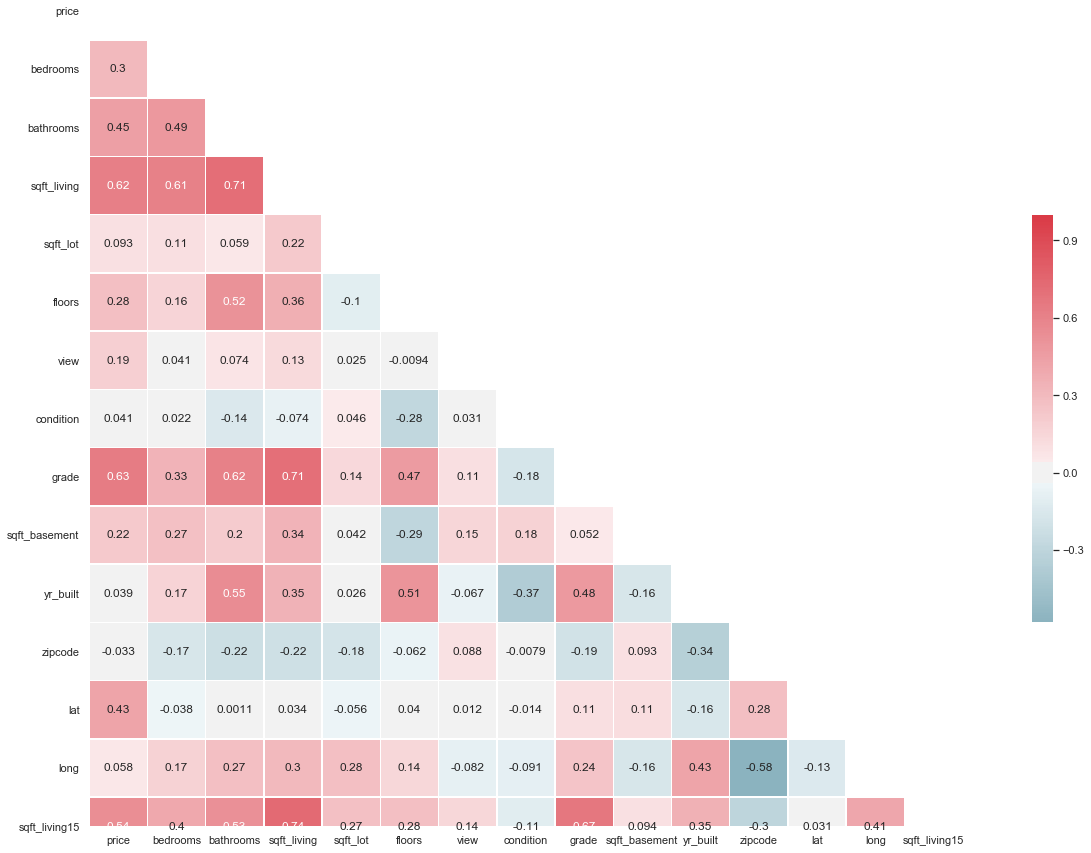

In [40]:
#After removing outliers, before logs and scales
sns.set(style="white")
#Correlations are low - good thing?


# Compute the correlation matrix
corr = df_clean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

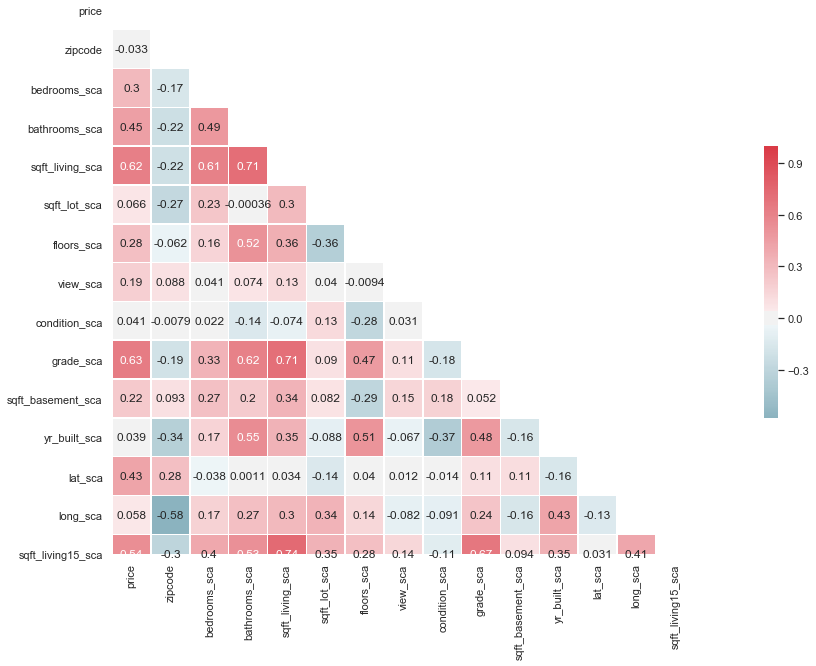

In [78]:
#After logs, scales, and removing unscaled variables
sns.set(style="white")
#Correlations are low - good thing?


# Compute the correlation matrix
corr = df_clean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

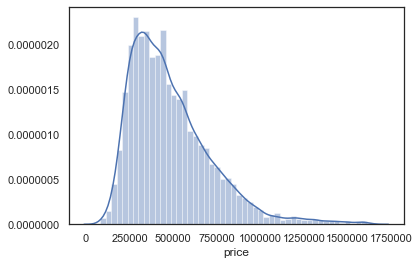

In [41]:
x = df_clean['price']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


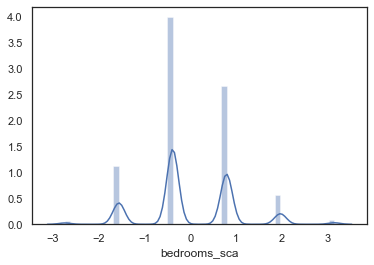

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_data = df_clean['bedrooms'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['bedrooms_sca'] = scale_data.flatten()

x = df_clean['bedrooms_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


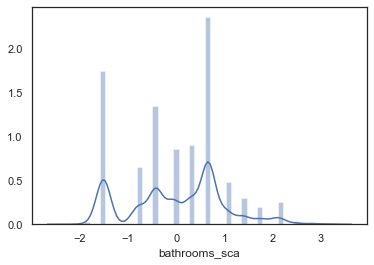

In [43]:
scaler = StandardScaler()
col_data = df_clean['bathrooms'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['bathrooms_sca'] = scale_data.flatten()

x = df_clean['bathrooms_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


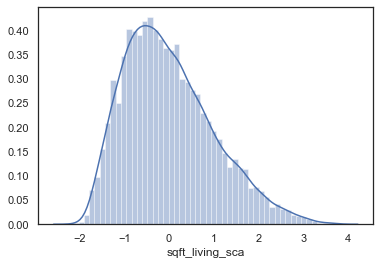

In [44]:
scaler = StandardScaler()
col_data = df_clean['sqft_living'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['sqft_living_sca'] = scale_data.flatten()

x = df_clean['sqft_living_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


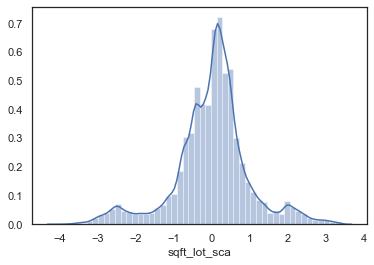

In [46]:
df_clean['sqft_lot'] = np.log(df_clean['sqft_lot'])

scaler = StandardScaler()
col_data = df_clean['sqft_lot'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['sqft_lot_sca'] = scale_data.flatten()

x = df_clean['sqft_lot_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


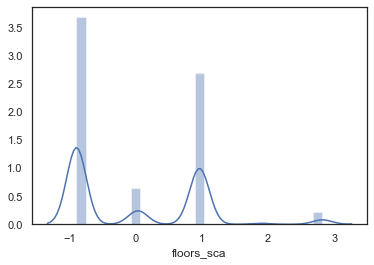

In [47]:
scaler = StandardScaler()
col_data = df_clean['floors'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['floors_sca'] = scale_data.flatten()

x = df_clean['floors_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


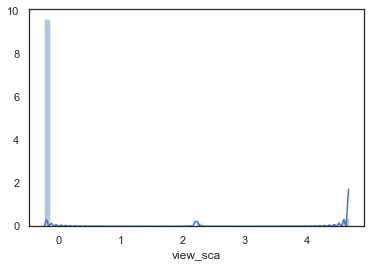

In [48]:
scaler = StandardScaler()
col_data = df_clean['view'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['view_sca'] = scale_data.flatten()

x = df_clean['view_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


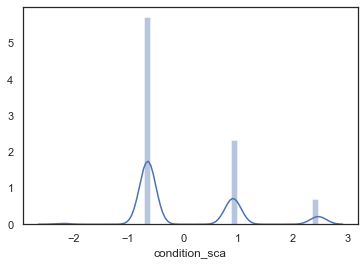

In [49]:
scaler = StandardScaler()
col_data = df_clean['condition'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['condition_sca'] = scale_data.flatten()

x = df_clean['condition_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


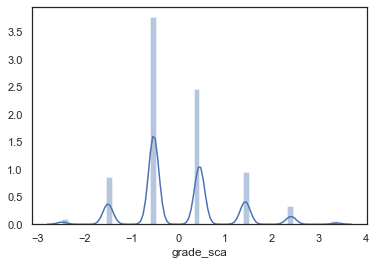

In [50]:
scaler = StandardScaler()
col_data = df_clean['grade'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['grade_sca'] = scale_data.flatten()

x = df_clean['grade_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


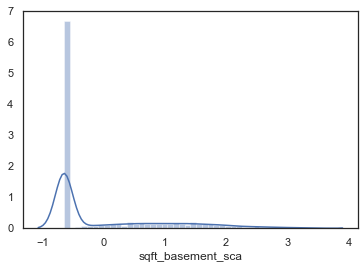

In [51]:
scaler = StandardScaler()
col_data = df_clean['sqft_basement'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['sqft_basement_sca'] = scale_data.flatten()

x = df_clean['sqft_basement_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


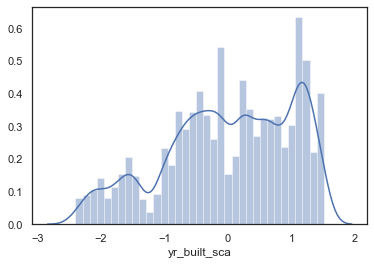

In [52]:
scaler = StandardScaler()
col_data = df_clean['yr_built'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['yr_built_sca'] = scale_data.flatten()

x = df_clean['yr_built_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


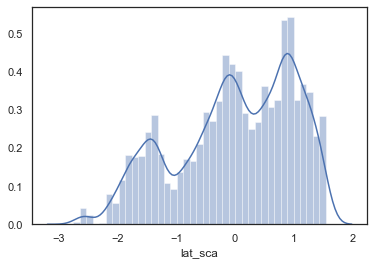

In [53]:
scaler = StandardScaler()
col_data = df_clean['lat'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['lat_sca'] = scale_data.flatten()

x = df_clean['lat_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


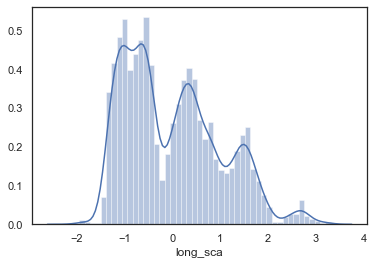

In [55]:
scaler = StandardScaler()
col_data = df_clean['long'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['long_sca'] = scale_data.flatten()

x = df_clean['long_sca']
ax = sns.distplot(x)

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


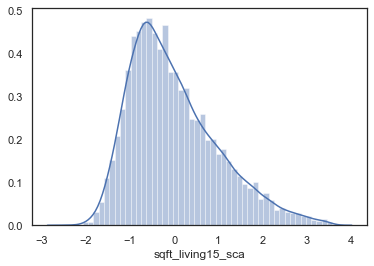

In [56]:
scaler = StandardScaler()
col_data = df_clean['sqft_living15'].values.reshape(-1,1)
scale_data = scaler.fit_transform(col_data)
df_clean['sqft_living15_sca'] = scale_data.flatten()

x = df_clean['sqft_living15_sca']
ax = sns.distplot(x)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


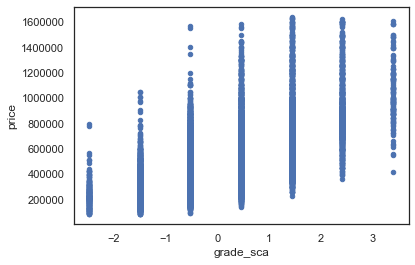

In [80]:
df_clean.plot("grade_sca","price", kind='scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


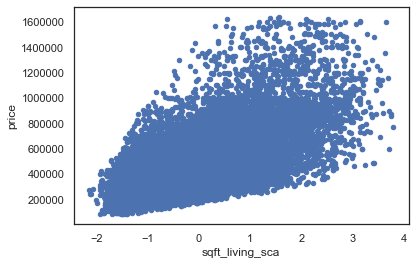

In [81]:
df_clean.plot("sqft_living_sca","price", kind='scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


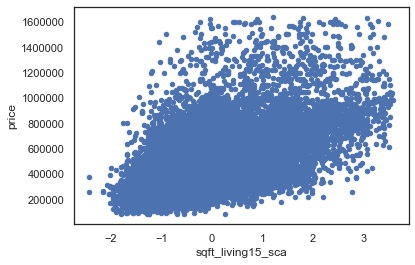

In [83]:
df_clean.plot("sqft_living15_sca","price", kind='scatter')

# MODEL

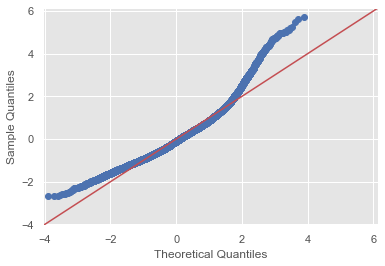

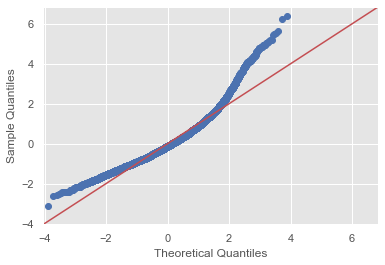

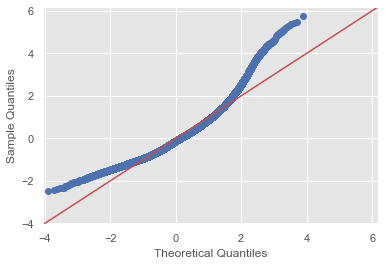

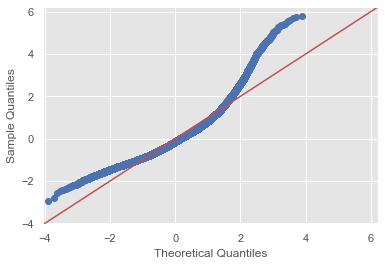

In [64]:
#Initial qq plots
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')

f = 'price~grade'
f2 = 'price~sqft_living'
f3 = 'price~sqft_living15'
model = smf.ols(formula=f, data=df_clean).fit()
model2 = smf.ols(formula=f2, data=df_clean).fit()
model3 = smf.ols(formula=f3, data=df_clean).fit()

resid1 = model.resid
resid2 = model2.resid
resid3 = model3.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid3, dist=stats.norm, line='45', fit=True)

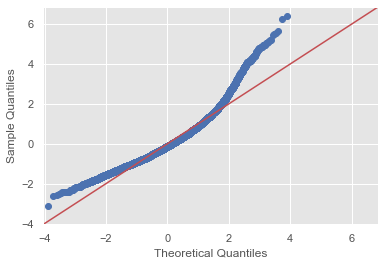

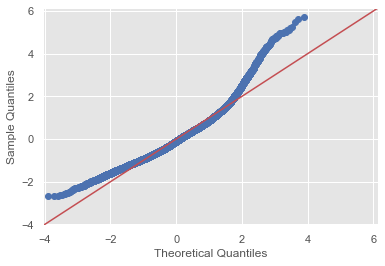

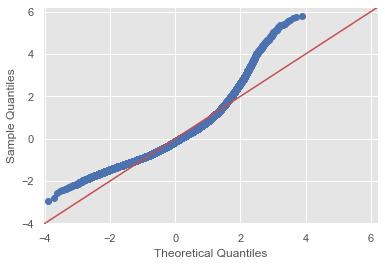

In [84]:
#QQ plots after cleaning & transforming
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')

f = 'price~grade_sca'
f2 = 'price~sqft_living_sca'
f3 = 'price~sqft_living15_sca'

model = smf.ols(formula=f, data=df_clean).fit()
model2 = smf.ols(formula=f2, data=df_clean).fit()
model3 = smf.ols(formula=f3, data=df_clean).fit()

resid1 = model.resid
resid2 = model2.resid
resid3 = model3.resid

fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid3, dist=stats.norm, line='45', fit=True)

In [85]:
from statsmodels.formula.api import ols

In [66]:
f = 'price~sqft_living+grade+sqft_above+sqft_living15'

In [67]:
#Initial model - only removed outliers
model = ols(formula=f, data=new_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     4359.
Date:                Fri, 22 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:25:20   Log-Likelihood:            -2.6168e+05
No. Observations:               19430   AIC:                         5.234e+05
Df Residuals:                   19425   BIC:                         5.234e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.433e+05   1.04e+04    -42.431      0.000   -4.64e+05   -4.23e+05
sqft_living     141.9358      3.462     40.993      0.000     135.149     148.723
grade          9.293e+04   1830.286     50.773      0.000    8.93e+04    9.65e+04
sqft_above      -68.7657      3.567    -19.279      0.000     -75.757     -61.774
sqft_living15    35.6440      3.260     10.933      0.000      29.254      42.034
==============================================================================
Omnibus:                     3561.863   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8612.444
Skew:                           1.030   Prob(JB):                         0.00
Kurtosis:                       5.529   Cond. No.                     2.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
f = 'price~grade_sca+sqft_living_sca+sqft_living15_sca'

In [87]:
#Revised Model - After cleaning and transforming
#Huh?????????
model = ols(formula=f, data=df_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     5581.
Date:                Fri, 22 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:18:40   Log-Likelihood:            -2.6179e+05
No. Observations:               19425   AIC:                         5.236e+05
Df Residuals:                   19421   BIC:                         5.236e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.854e+05   1237.607    392.232      0.000    4.83e+05    4.88e+05
grade_sca           8.68e+04   1840.755     47.154      0.000    8.32e+04    9.04e+04
sqft_living_sca    7.434e+04   2025.664     36.697      0.000    7.04e+04    7.83e+04
sqft_living15_sca   1.44e+04   1930.767      7.457      0.000    1.06e+04    1.82e+04
==============================================================================
Omnibus:                     3595.518   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8496.750
Skew:                           1.047   Prob(JB):                         0.00
Kurtosis:                       5.472   Cond. No.                         3.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Train-Test Split

In [88]:
from sklearn.model_selection import train_test_split
X = df_clean.drop('price', axis=1)
y = df_clean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [89]:
df_train = pd.DataFrame(X_train, columns = X.columns)
df_train['price'] = y_train
df_test = pd.DataFrame(X_test, columns = X.columns)
df_test['price'] = y_test

In [90]:
from sklearn.metrics import r2_score
y_hat_test = model.predict(df_test)
r2_score(y_test, y_hat_test)

0.4744543945554258

# iNTERPRET

In [91]:
#So far, I interpret that my r2 score is trash. Help plz.

# CONCLUSIONS & RECOMMENDATIONS

> Summarize your conclusions and bullet-point your list of recommendations, which are based on your modeling results.